In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

import statsmodels.api as sm # OLS
from sklearn.linear_model import Lasso #LASSO
from scipy import stats

from itertools import islice
from datetime import datetime

import pandas_market_calendars as mcal

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


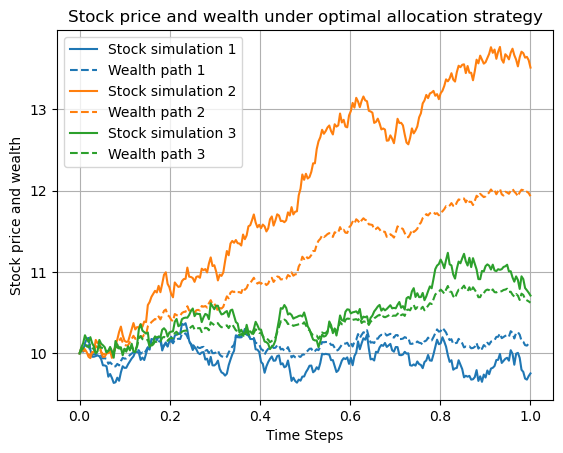

In [21]:
# market setting
S0 = 10    # Initial stock price
mu = 0.1   # Drift (annualized)
sigma = 0.1 # Volatility (annualized)
r = 0.05 # risk-free rate
T = 1     # Time horizon (1 year)
N = 252     # Number of steps (trading days in a year)
dt = T / N  # Time step
time = np.linspace(0, T, N)

num_sim = 3 # number of simulations
line_style = ['-','--']
color = ['#1f77b4', '#ff7f0e', '#2ca02c'] #['blue','orange','green']
#np.random.seed(42)  # For reproducibility

#plt.figure(figsize=(10, 6))

# Merton's portfolio selection problem setting
X0 = 10
gamma = 10
def uility(x,gamma):
    u=x**(1-gamma)/(1-gamma)
    return u

# optimal allocation 
a_star = (mu-r)/sigma**2/gamma

# Simulate GBM and wealth process under optimal allocation
for i in range(num_sim):
    Z = np.random.standard_normal(N)

    S = np.zeros(N)
    S[0] = S0
    X = np.zeros(N)
    X[0] = X0
    for t in range(1, N):
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t])
        X[t] = X[t-1] * np.exp(((a_star*mu + (1-a_star)*r) - 0.5 * a_star**2 * sigma**2) * dt + a_star * sigma * np.sqrt(dt) * Z[t])

    plt.plot(time,S,linestyle=line_style[0], color=color[i], label=f'Stock simulation {i+1}')
    plt.plot(time,X,linestyle=line_style[1], color=color[i], label=f'Wealth path {i+1}')


plt.title('Stock price and wealth under optimal allocation strategy')
plt.xlabel('Time Steps')
plt.ylabel('Stock price and wealth')
plt.legend()
plt.grid(True)
#plt.show()
plt.ylabel('Stock price and wealth')
plt.savefig('merton1.eps', format='eps')

for different gammas

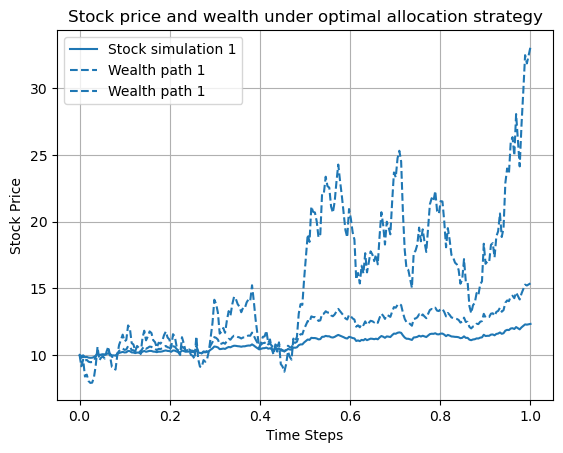

In [26]:
# market setting
S0 = 10    # Initial stock price
mu = 0.1   # Drift (annualized)
sigma = 0.1 # Volatility (annualized)
r = 0.05 # risk-free rate
T = 1     # Time horizon (1 year)
N = 252     # Number of steps (trading days in a year)
dt = T / N  # Time step
time = np.linspace(0, T, N)

num_sim = 1 # number of simulations
line_style = ['-','--']
color = ['#1f77b4', '#ff7f0e', '#2ca02c'] #['blue','orange','green']
#np.random.seed(42)  # For reproducibility

#plt.figure(figsize=(10, 6))

# Merton's portfolio selection problem setting
X0 = 10
gamma = [0.5,2]
num_gamma = len(gamma)
def uility(x,gamma):
    u=x**(1-gamma)/(1-gamma)
    return u


# Simulate stock price GBM and wealth process under optimal allocation
for i in range(num_sim):
    Z = np.random.standard_normal(N)

    S = np.zeros(N)
    S[0] = S0
    X = np.zeros((num_gamma,N))
    for j in range(num_gamma):
        X[j,0]=X0
    for t in range(1, N):
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t])
        for j in range(num_gamma):
            # optimal allocation 
            a_star = (mu-r)/sigma**2/gamma[j]
            X[j,t] = X[j,t-1] * np.exp(((a_star*mu + (1-a_star)*r) - 0.5 * a_star**2 * sigma**2) * dt + a_star * sigma * np.sqrt(dt) * Z[t])

    plt.plot(time,S,linestyle=line_style[0], color=color[i], label=f'Stock simulation {i+1}')
    for k in range(num_gamma):
        plt.plot(time,X[k,:],linestyle=line_style[1], color=color[i], label=f'Wealth path {i+1}')


plt.title('Stock price and wealth under optimal allocation strategy')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()